In [1]:
include("hough.jl")
include("test.jl")
using SymPy

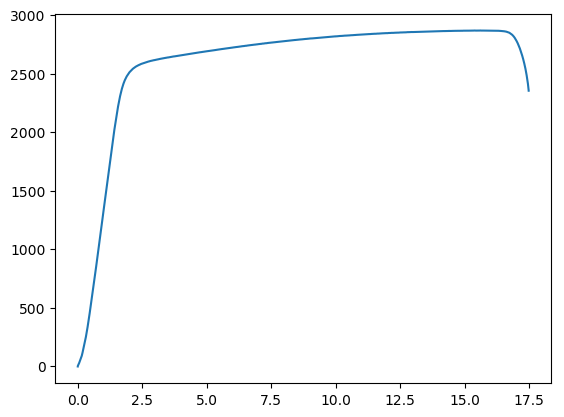

size(data) = (2890, 2)


In [15]:
data = readData("A")';
data[:,1] .= data[:,1];
data[:,2] .= data[:,2];
@show size(data);
plot(data[1:end-100,1],data[1:end-100,2]);

In [16]:
theta,rho,houghSpace=weightedHough(data[1:end-100,:], 5000, 5000, [1e-15, pi/10])

(1.0e-15:6.28444219561869e-5:0.3141592653589793, -2867.7795423986604:1.1473412852165075:2867.7795423986604, [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

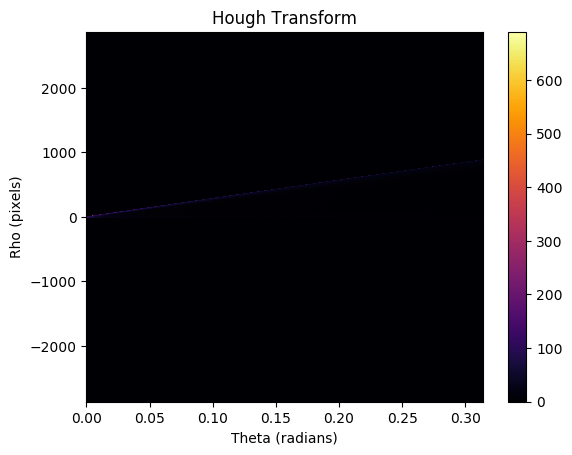

In [17]:
figure(2)
pcolormesh(theta,rho,Array(houghSpace), shading="flat", cmap="inferno");
title("Hough Transform");
xlabel("Theta (radians)");
ylabel("Rho (pixels)");
colorbar();

In [18]:
#=
houghcopy = copy(houghSpace);
best = ones(Int64, 1)
minRadius = 20
sizehc = size(houghcopy)
for i in eachindex(best)
    best[i] = indmax(houghcopy)
    idx, idy = ind2sub(houghcopy, best[i])
    houghcopy[max(idx-minRadius,1):min(idx+minRadius,sizehc[1]), max(idy-minRadius,1):min(idy+minRadius,sizehc[2])] = 0
end
=#
best = indmax(houghSpace)
idx, idy = ind2sub(houghSpace, best)
@show idx,idy
#=
figure(3)
pcolormesh(Array(theta),Array(rho),Array(houghSpace), shading="flat", cmap="inferno");
title("Hough Transform");
xlabel("Theta (radians)");
ylabel("Rho (pixels)");
colorbar()
scatter(theta[idy], rho[idx], color="red")
=#

(idx, idy) = (2500, 1)


(2500, 1)

In [11]:
@show theta[idy], rho[idx]
g(x,p,theta) = (p/sin(theta)-x*cot(theta))
@show rho[idx[1]]/sin(theta[idy[1]]), cot(theta[idy[1]])
#=
figure(5)
range = linspace(0,0.1,200)
plot(data[:,1],data[:,2]);
for i in eachindex(idx)
    #@show rho[idx[i]]/sin(theta[idy[i]])
    #@show cot(theta[idy[i]])
    plot(range,g.(range,rho[idx[i]], theta[idy[i]]))
    xlim([0,0.10])
end
=#

(theta[idy], rho[idx]) = (1.0e-15, -0.573671458573877)
(rho[idx[1]] / sin(theta[idy[1]]), cot(theta[idy[1]])) = (-5.73671458573877e14, 9.999999999999999e14)


(-5.73671458573877e14, 9.999999999999999e14)

In [12]:
@syms x
g(x, rho[250], theta[1])

-1.0e+15⋅x - 2.58209523504102e+18